# EDA with Vader
-------------

Loading data and models for CRF cross validations

In [1]:
import __init__
import models.crf as crf
import models.cross_validator as cross_validator
import models.datahandler as datahandler
from models.datamodel import DataModel
import models.outputmaker as outputmaker
import evaluator.metrics as metrics

trial = datahandler.load_train('../data/dataset/tsd_trial.csv', verbose=True)
train = datahandler.load_train('../data/dataset/tsd_train.csv', verbose=True)

/home/hb/.local/lib/python3.6/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


,spans,text
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...
1,"[29, 30, 31, 32, 33, 34]",How about we stop protecting idiots and let na...
2,"[166, 167, 168, 169, 170, 171]","If people were smart, they would Boycott th..."


,spans,text
0,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...",Another violent and aggressive immigrant killi...
1,"[33, 34, 35, 36, 37, 38, 39]","I am 56 years old, I am not your fucking junio..."
2,"[0, 1, 2, 3]","Damn, a whole family. Sad indeed."


Initialize `CRF Model` Methods

### Train on train data, test on trial data

In [3]:
model = crf.CRF()

datamodel = DataModel(model='crf')

output_maker = outputmaker.crf_output

evaluator = metrics

In [28]:
X_train, y_train , taboo_words_train, _ = cross_validator.load_data(train, [i for i in range(train.shape[0])], 
                                                    datamodel, logger=True)

X_test, y_test , taboo_words_test, test_texts = cross_validator.load_data(trial, [i for i in range(trial.shape[0])], 
                                                           datamodel, logger=True)

100%|██████████| 690/690 [00:10<00:00, 63.81it/s]


In [75]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

vader = SentimentIntensityAnalyzer()

def get_tabo_words_si(taboo_words):
    words = [ word.split()  for word in taboo_words if word != '']
    words = [w for word in words for w in word]
    
    scores = [vader.polarity_scores(word)['compound'] for word in words]
    return scores

def get_sent_si(sents):
    scores = [vader.polarity_scores(sent.replace("-"," ").replace("/", " "))['compound'] for sent in sents]
    return scores

def stats(data):
    ax = sns.boxplot(x=data)
    print("Total:", len(data))
    print("Mean:", np.mean(data))
    print("STD :", np.std(data))
    print("Max:", np.max(data))
    print("Min:", np.min(data))
    print("Zero values:", sum((np.array(data) == 0).astype(int)))
    print("+ values:", sum((np.array(data) > 0).astype(int)))
    print("- values:", sum((np.array(data) < 0).astype(int)))
    print("None-Zero values:", len(data) - sum((np.array(data) == 0).astype(int)))
    print("Mean without Zero values:", np.mean(np.array([d for d in data if d!=0])))
    #print("STD without Zero values:", np.std(np.array([d for d in data if d!=0])))
    print("Mean of + values:", np.mean(np.array([d for d in data if d > 0])))
    print("Mean of - values:", np.mean(np.array([d for d in data if d < 0])))

In [76]:
scores_train = get_tabo_words_si(taboo_words_train)
scores_test = get_tabo_words_si(taboo_words_test)

STATS on Train set:
Total: 23511
Mean: -0.1428722640466165
STD : 0.24330729469411938
Max: 0.6369
Min: -0.7096
Zero values: 15428
+ values: 636
- values: 7447
None-Zero values: 8083
Mean without Zero values: -0.4155721638005691
Mean of + values: 0.3269441823899371
Mean of - values: -0.4789856720827179


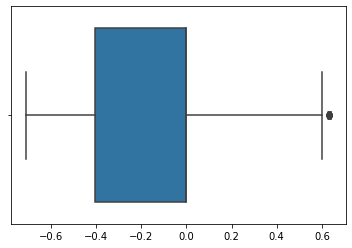

In [77]:
print("STATS on Train set:")
stats(scores_train)

----------------------
STATS on test set:
Total: 1725
Mean: -0.1675662028985507
STD : 0.2521099608948318
Max: 0.6369
Min: -0.7096
Zero values: 1046
+ values: 46
- values: 633
None-Zero values: 679
Mean without Zero values: -0.42570206185567006
Mean of + values: 0.3254043478260869
Mean of - values: -0.48028483412322276


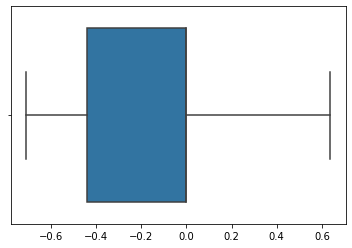

In [78]:
print("----------------------")
print("STATS on test set:")
stats(scores_test)

In [79]:
train_sent_si = get_sent_si(_)
test_sent_si = get_sent_si(test_texts)

STATS on train set:
Total: 7939
Mean: -0.32919685098878954
STD : 0.5261966048260901
Max: 0.9938
Min: -0.9956
Zero values: 516
+ values: 1805
- values: 5618
None-Zero values: 7423
Mean without Zero values: -0.35208053347703083
Mean of + values: 0.483375567867036
Mean of - values: -0.6205031505873977


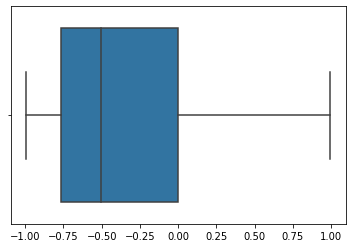

In [80]:
print("STATS on train set:")
stats(train_sent_si)

STATS on test set:
Total: 690
Mean: -0.34489681159420293
STD : 0.518202163886355
Max: 0.9552
Min: -0.9879
Zero values: 41
+ values: 146
- values: 503
None-Zero values: 649
Mean without Zero values: -0.3666853620955316
Mean of + values: 0.4939534246575342
Mean of - values: -0.6164930417495029


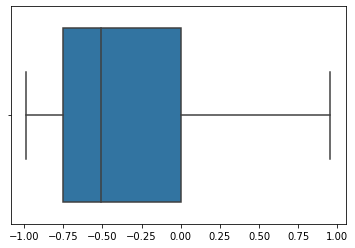

In [81]:
print("STATS on test set:")
stats(test_sent_si)